## Name: Ujwal Vikas Agrawal ASU ID: 1229734599

In [1]:
# Import necessary libraries
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyspark.sql.functions import avg
from pyspark.sql.functions import countDistinct
from pyspark.sql.functions import desc, asc


In [2]:
# Create a Spark session
spark = SparkSession.builder \
    .appName("YelpUserAnalysis") \
    .getOrCreate()

24/11/24 20:07:59 WARN Utils: Your hostname, yelp resolves to a loopback address: 127.0.1.1; using 192.168.64.2 instead (on interface enp0s1)
24/11/24 20:07:59 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/24 20:08:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
business_df = spark.read.json("file:///home/dps/Documents/yelp_dataset/yelp_academic_dataset_business.json")
checkin_df = spark.read.json('file:///home/dps/Documents/yelp_dataset/yelp_academic_dataset_checkin.json')
review_df = spark.read.json('file:///home/dps/Documents/yelp_dataset/yelp_academic_dataset_review.json')
tip_df = spark.read.json('file:///home/dps/Documents/yelp_dataset/yelp_academic_dataset_tip.json')
user_df = spark.read.json('file:///home/dps/Documents/yelp_dataset/yelp_academic_dataset_user.json')

24/11/24 20:08:10 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [4]:
automotive_df = business_df.filter(business_df["categories"].contains("Automotive"))

In [5]:
automotive_df.head(1)

[Row(address='625 N Stone Ave', attributes=Row(AcceptsInsurance=None, AgesAllowed=None, Alcohol=None, Ambience=None, BYOB=None, BYOBCorkage=None, BestNights=None, BikeParking=None, BusinessAcceptsBitcoin=None, BusinessAcceptsCreditCards='True', BusinessParking=None, ByAppointmentOnly='False', Caters=None, CoatCheck=None, Corkage=None, DietaryRestrictions=None, DogsAllowed=None, DriveThru='False', GoodForDancing=None, GoodForKids=None, GoodForMeal=None, HairSpecializesIn=None, HappyHour=None, HasTV=None, Music=None, NoiseLevel=None, Open24Hours=None, OutdoorSeating=None, RestaurantsAttire=None, RestaurantsCounterService=None, RestaurantsDelivery=None, RestaurantsGoodForGroups=None, RestaurantsPriceRange2=None, RestaurantsReservations=None, RestaurantsTableService=None, RestaurantsTakeOut=None, Smoking=None, WheelchairAccessible=None, WiFi="u'free'"), business_id='rBmpy_Y1UbBx8ggHlyb7hA', categories='Automotive, Auto Parts & Supplies, Auto Customization', city='Tucson', hours=Row(Friday=

In [6]:
automotive_df = automotive_df.withColumnRenamed("stars", "bstars")


In [7]:
review_df.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



In [8]:
# Extract the top 10 users by review count
top_users_df = user_df.orderBy(user_df.review_count.desc()).limit(10)
top_users_df.show()


+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+------+--------------------+----+--------------------+------+--------+------------+------+--------------------+-------------------+
|average_stars|compliment_cool|compliment_cute|compliment_funny|compliment_hot|compliment_list|compliment_more|compliment_note|compliment_photos|compliment_plain|compliment_profile|compliment_writer|  cool|               elite|fans|             friends| funny|    name|review_count|useful|             user_id|      yelping_since|
+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+------+--------------------+----+--------------------+------+--------+------------+------+--------------------+-------------------+
|      

In [ ]:
top_users_df = user_df.orderBy(user_df.review_count.desc()).limit(10).withColumnRenamed("name", "user_name")
top_users_df.show()

+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+------+--------------------+----+--------------------+------+---------+------------+------+--------------------+-------------------+
|average_stars|compliment_cool|compliment_cute|compliment_funny|compliment_hot|compliment_list|compliment_more|compliment_note|compliment_photos|compliment_plain|compliment_profile|compliment_writer|  cool|               elite|fans|             friends| funny|user_name|review_count|useful|             user_id|      yelping_since|
+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+------+--------------------+----+--------------------+------+---------+------------+------+--------------------+-------------------+
|   

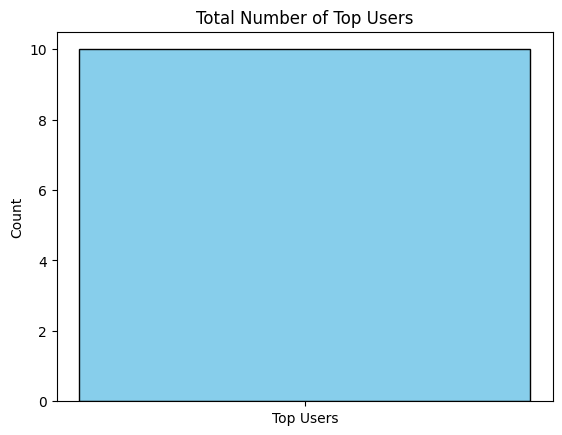

In [9]:
# Total number of top users
user_count = top_users_df.count()

# Visualization
import matplotlib.pyplot as plt
plt.bar(["Top Users"], [user_count], color="skyblue", edgecolor="black")
plt.title("Total Number of Top Users")
plt.ylabel("Count")
plt.show()


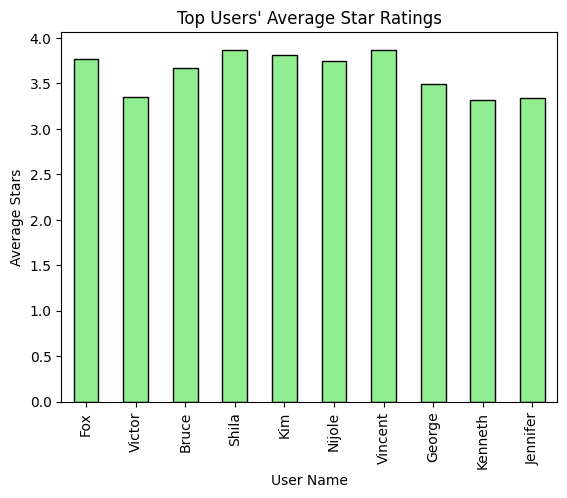

In [31]:
# Calculate average star ratings for top users
avg_star_ratings = top_users_df.select("user_name", "average_stars").toPandas()

# Visualization
avg_star_ratings.plot(kind="bar", x="user_name", y="average_stars", legend=False, color="lightgreen", edgecolor="black")
plt.title("Top Users' Average Star Ratings")
plt.ylabel("Average Stars")
plt.xlabel("User Name")
plt.show()

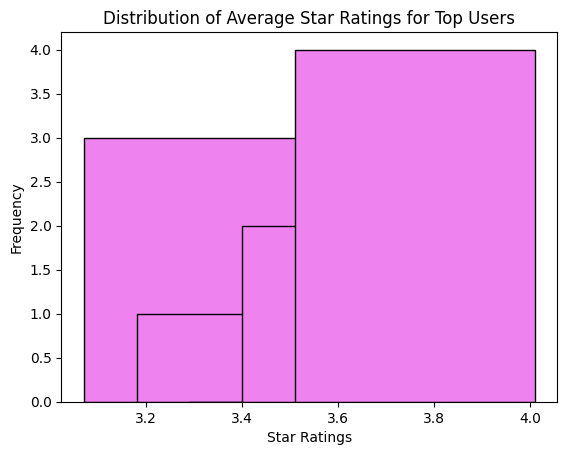

In [13]:
# Average star ratings distribution
avg_star_dist = top_users_df.select("average_stars").rdd.flatMap(lambda x: x).histogram(5)

# Visualization
plt.bar(avg_star_dist[0][:-1], avg_star_dist[1], width=0.5, edgecolor="black", color="violet")
plt.xlabel("Star Ratings")
plt.ylabel("Frequency")
plt.title("Distribution of Average Star Ratings for Top Users")
plt.show()


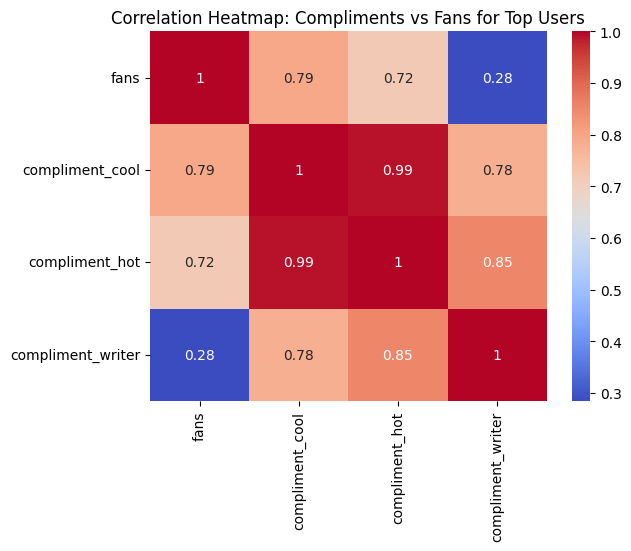

In [14]:
# Heatmap of correlations
import seaborn as sns

heatmap_data = top_users_df.select("fans", "compliment_cool", "compliment_hot", "compliment_writer").toPandas()
sns.heatmap(heatmap_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap: Compliments vs Fans for Top Users")
plt.show()


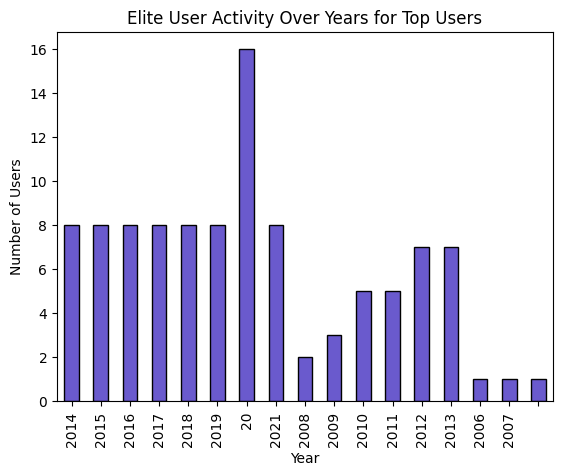

In [15]:
# Extract year from elite field
from pyspark.sql.functions import explode, split

elite_years = top_users_df.withColumn("elite_year", explode(split("elite", ",")))
elite_activity = elite_years.groupBy("elite_year").count()
elite_pd = elite_activity.toPandas()

# Visualization
elite_pd.plot(kind="bar", x="elite_year", y="count", legend=False, color="slateblue", edgecolor="black")
plt.title("Elite User Activity Over Years for Top Users")
plt.xlabel("Year")
plt.ylabel("Number of Users")
plt.show()

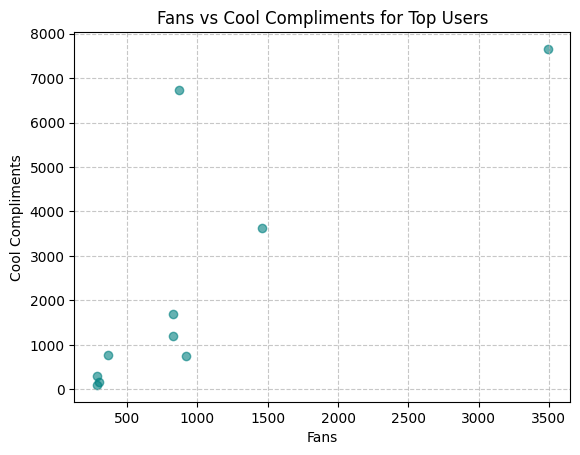

In [16]:
# Scatter plot
scatter_data = top_users_df.select("fans", "compliment_cool").toPandas()
plt.scatter(scatter_data["fans"], scatter_data["compliment_cool"], color="teal", alpha=0.6)
plt.title("Fans vs Cool Compliments for Top Users")
plt.xlabel("Fans")
plt.ylabel("Cool Compliments")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


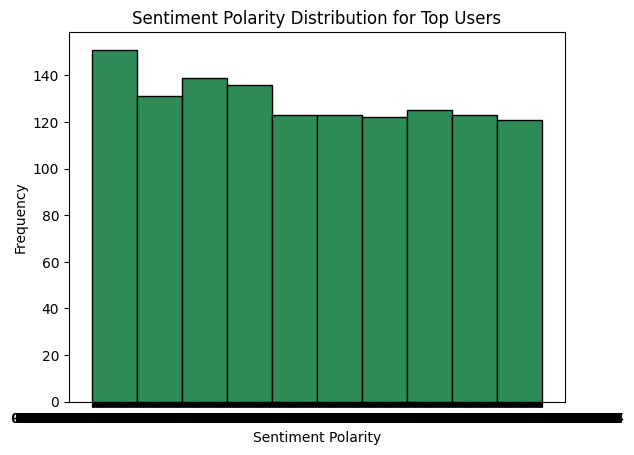

In [17]:
# Sentiment analysis
from pyspark.sql.functions import udf
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

sentiment_udf = udf(get_sentiment)
review_sentiments = review_df.join(top_users_df, "user_id").withColumn("sentiment", sentiment_udf(review_df.text))

# Visualization
sentiment_pd = review_sentiments.select("sentiment").toPandas()
plt.hist(sentiment_pd["sentiment"], bins=10, color="seagreen", edgecolor="black")
plt.title("Sentiment Polarity Distribution for Top Users")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()


24/11/24 20:12:59 WARN Instrumentation: [dd9db377] regParam is zero, which might cause numerical instability and overfitting.
24/11/24 20:13:09 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/11/24 20:13:09 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


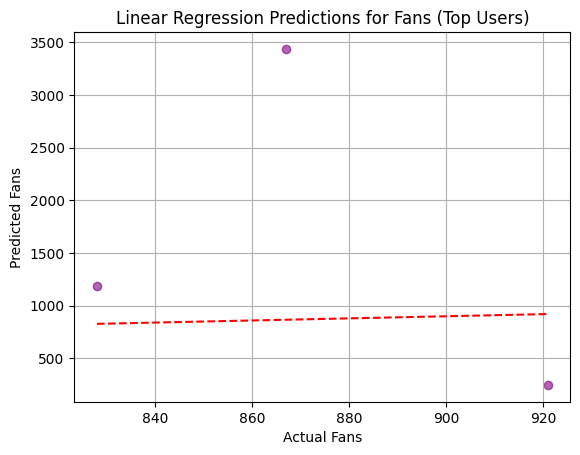

In [18]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Prepare data
assembler = VectorAssembler(inputCols=["cool", "compliment_cool", "compliment_hot"], outputCol="features")
data = assembler.transform(top_users_df).select("features", "fans")

# Train-test split
train, test = data.randomSplit([0.8, 0.2])

# Train model
lr = LinearRegression(labelCol="fans")
lr_model = lr.fit(train)

# Predictions
predictions = lr_model.transform(test).select("features", "fans", "prediction")
pred_pd = predictions.toPandas()

# Visualization
plt.scatter(pred_pd["fans"], pred_pd["prediction"], color="purple", alpha=0.6)
plt.plot([pred_pd["fans"].min(), pred_pd["fans"].max()], [pred_pd["fans"].min(), pred_pd["fans"].max()], color="red", linestyle="--")
plt.title("Linear Regression Predictions for Fans (Top Users)")
plt.xlabel("Actual Fans")
plt.ylabel("Predicted Fans")
plt.grid(True)
plt.show()


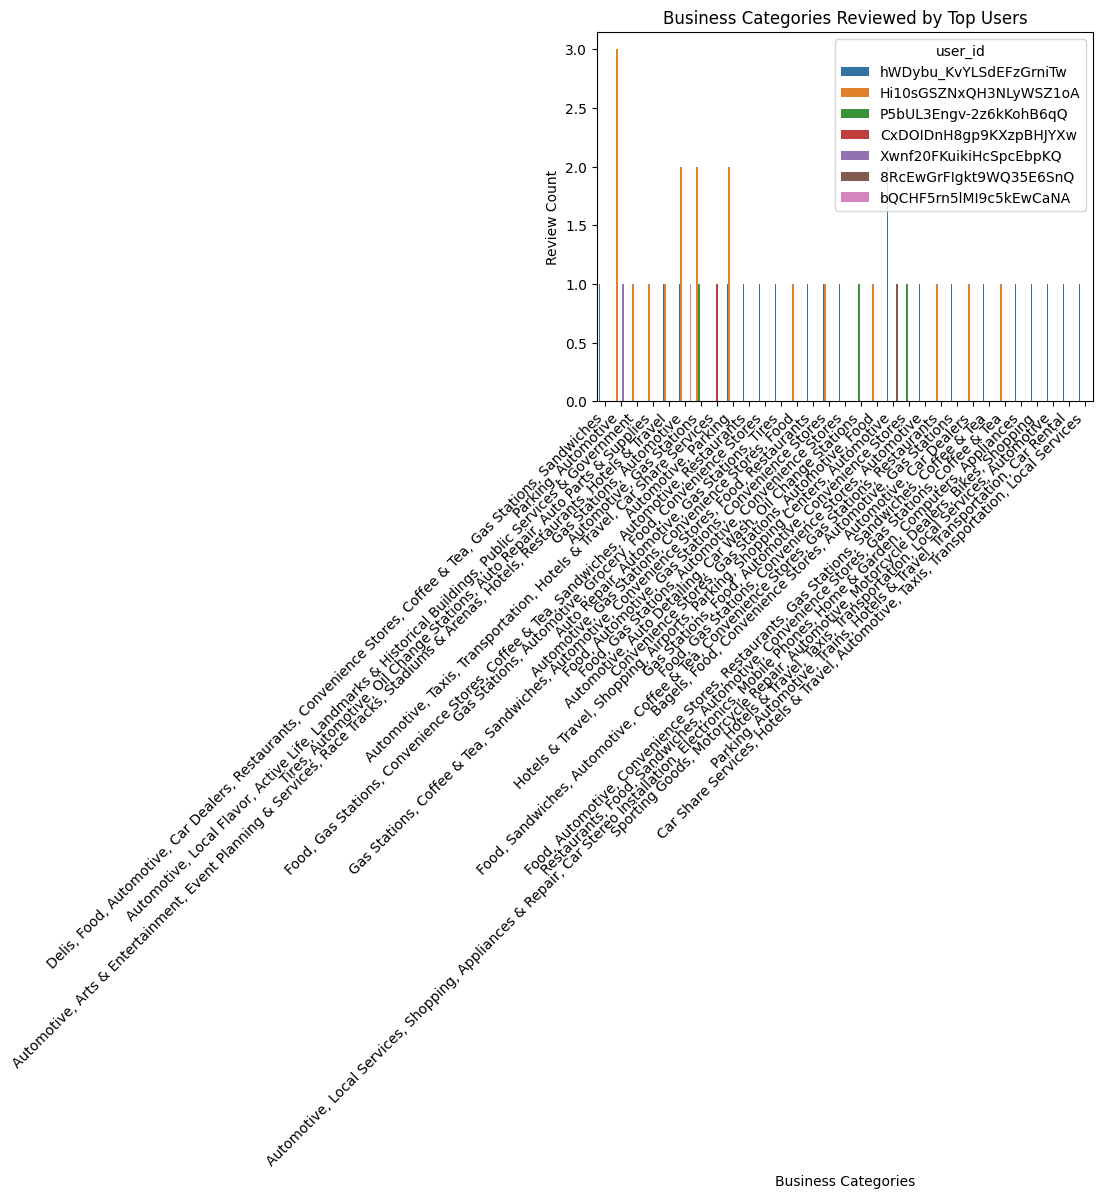

In [24]:
# Analyze business categories reviewed by top users
business_categories = review_df.join(top_users_df, "user_id") \
                               .join(automotive_df, "business_id") \
                               .groupBy("user_id", "categories") \
                               .count()

# Visualization
business_categories_pd = business_categories.toPandas()
sns.barplot(data=business_categories_pd, x="categories", y="count", hue="user_id")
plt.title("Business Categories Reviewed by Top Users")
plt.ylabel("Review Count")
plt.xlabel("Business Categories")
plt.xticks(rotation=45, ha="right")
plt.show()

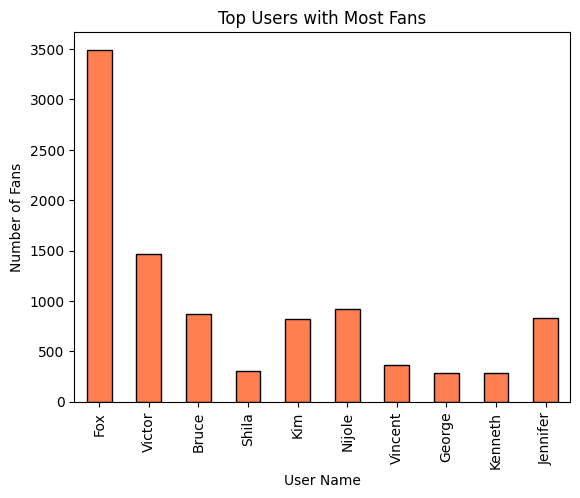

In [32]:
# Extract fans for top users
top_fans = top_users_df.select("user_name", "fans").toPandas()

# Visualization
top_fans.plot(kind="bar", x="user_name", y="fans", legend=False, color="coral", edgecolor="black")
plt.title("Top Users with Most Fans")
plt.ylabel("Number of Fans")
plt.xlabel("User Name")
plt.show()


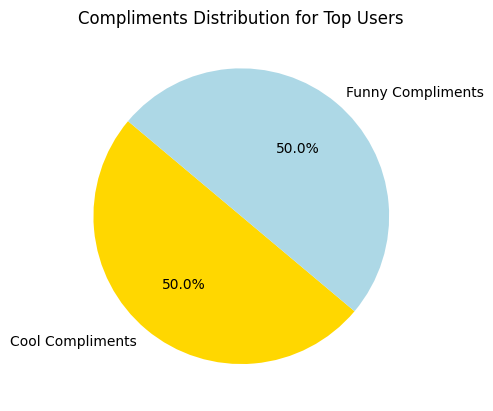

In [33]:
# Calculate total compliments
compliments = top_users_df.groupBy().sum("compliment_cool", "compliment_funny").collect()[0]
cool_total = compliments["sum(compliment_cool)"]
funny_total = compliments["sum(compliment_funny)"]

# Visualization
plt.pie([cool_total, funny_total], labels=["Cool Compliments", "Funny Compliments"], autopct="%1.1f%%", startangle=140, colors=["gold", "lightblue"])
plt.title("Compliments Distribution for Top Users")
plt.show()

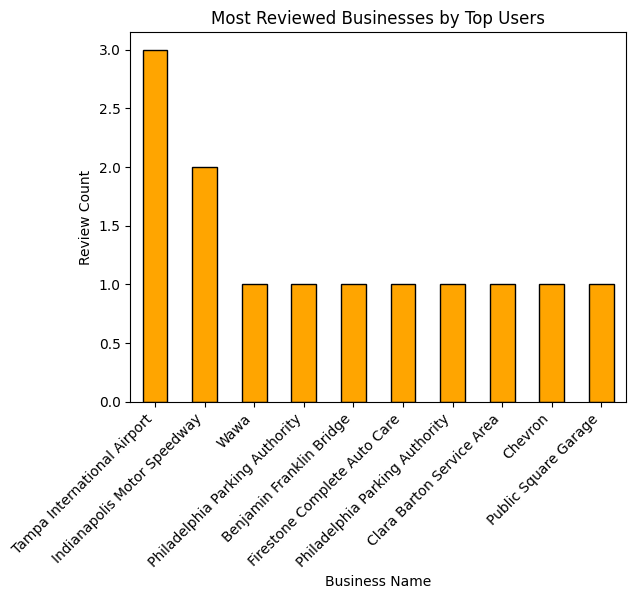

In [34]:
# Find most reviewed businesses by top users
from pyspark.sql.functions import col

most_reviewed_businesses = review_df.join(top_users_df, "user_id") \
                                    .join(automotive_df, "business_id") \
                                    .groupBy("business_id", "name") \
                                    .count() \
                                    .orderBy(col("count").desc()) \
                                    .limit(10)

# Visualization
businesses_pd = most_reviewed_businesses.toPandas()
businesses_pd.plot(kind="bar", x="name", y="count", legend=False, color="orange", edgecolor="black")
plt.title("Most Reviewed Businesses by Top Users")
plt.ylabel("Review Count")
plt.xlabel("Business Name")
plt.xticks(rotation=45, ha="right")
plt.show()

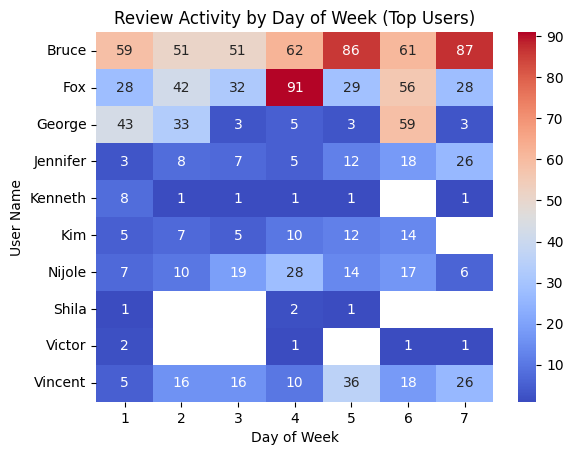

In [36]:
from pyspark.sql.functions import dayofweek

# Extract review dates and days
review_days = review_df.join(top_users_df, "user_id") \
                       .withColumn("day_of_week", dayofweek(col("date"))) \
                       .groupBy("user_name", "day_of_week") \
                       .count()

# Visualization
review_days_pd = review_days.toPandas().pivot(index="user_name", columns="day_of_week", values="count")
sns.heatmap(review_days_pd, annot=True, cmap="coolwarm")
plt.title("Review Activity by Day of Week (Top Users)")
plt.xlabel("Day of Week")
plt.ylabel("User Name")
plt.show()

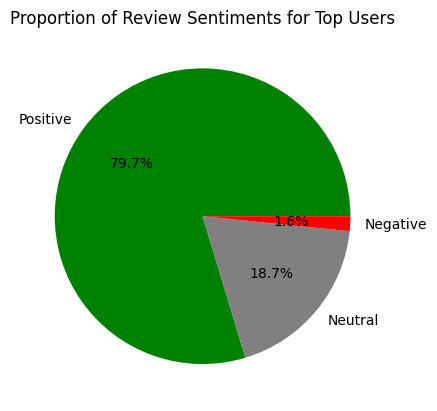

In [37]:
# Classify sentiments into positive, neutral, and negative
def classify_sentiment(polarity):
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

classify_sentiment_udf = udf(classify_sentiment)

review_sentiment_classes = review_df.join(top_users_df, "user_id") \
                                    .withColumn("sentiment", sentiment_udf(col("text"))) \
                                    .withColumn("sentiment_class", classify_sentiment_udf(col("sentiment"))) \
                                    .groupBy("sentiment_class") \
                                    .count()

# Visualization
sentiment_classes_pd = review_sentiment_classes.toPandas()
plt.pie(sentiment_classes_pd["count"], labels=sentiment_classes_pd["sentiment_class"], autopct="%1.1f%%", colors=["green", "grey", "red"])
plt.title("Proportion of Review Sentiments for Top Users")
plt.show()

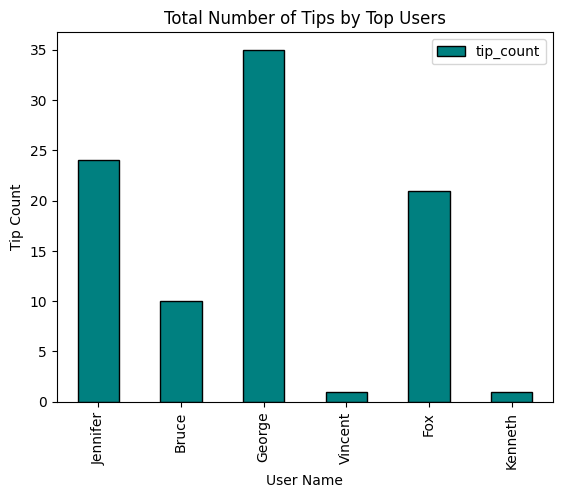

In [43]:
# Join tip_df with top_users_df to filter tips by top users
tips_by_top_users = tip_df.join(top_users_df, "user_id", "inner") \
                          .groupBy("user_name") \
                          .count() \
                          .withColumnRenamed("count", "tip_count")

# Visualization
tips_by_top_users_pd = tips_by_top_users.toPandas()
tips_by_top_users_pd.plot(kind="bar", x="user_name", y="tip_count", color="teal", edgecolor="black")
plt.title("Total Number of Tips by Top Users")
plt.xlabel("User Name")
plt.ylabel("Tip Count")
plt.show()


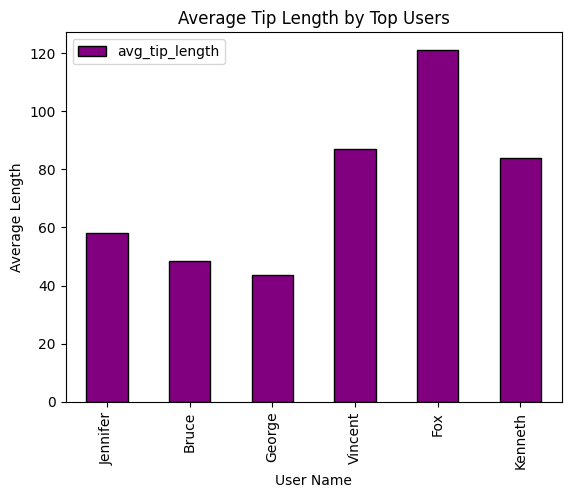

In [44]:
from pyspark.sql.functions import length, avg

# Calculate average tip length for top users
avg_tip_length = tip_df.join(top_users_df, "user_id", "inner") \
                       .withColumn("tip_length", length("text")) \
                       .groupBy("user_name") \
                       .agg(avg("tip_length").alias("avg_tip_length"))

# Visualization
avg_tip_length_pd = avg_tip_length.toPandas()
avg_tip_length_pd.plot(kind="bar", x="user_name", y="avg_tip_length", color="purple", edgecolor="black")
plt.title("Average Tip Length by Top Users")
plt.xlabel("User Name")
plt.ylabel("Average Length")
plt.show()


/tmp/ipykernel_1767/1903657431.py:16: FutureWarning:                            

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tip_sentiments_pd, x="user_name", y="sentiment", palette="Set2")


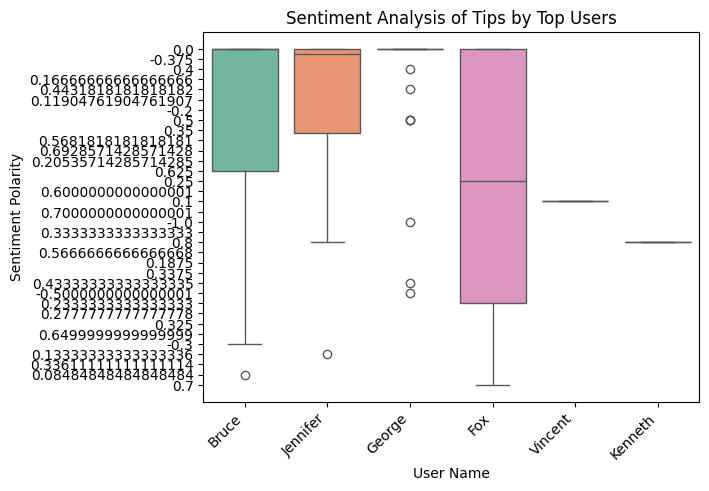

In [45]:
from textblob import TextBlob

# Define UDF for sentiment analysis
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

sentiment_udf = udf(get_sentiment)

# Analyze sentiment of tips by top users
tip_sentiments = tip_df.join(top_users_df, "user_id", "inner") \
                       .withColumn("sentiment", sentiment_udf("text")) \
                       .select("user_name", "sentiment")

# Visualization
tip_sentiments_pd = tip_sentiments.toPandas()
sns.boxplot(data=tip_sentiments_pd, x="user_name", y="sentiment", palette="Set2")
plt.title("Sentiment Analysis of Tips by Top Users")
plt.xlabel("User Name")
plt.ylabel("Sentiment Polarity")
plt.xticks(rotation=45, ha="right")
plt.show()


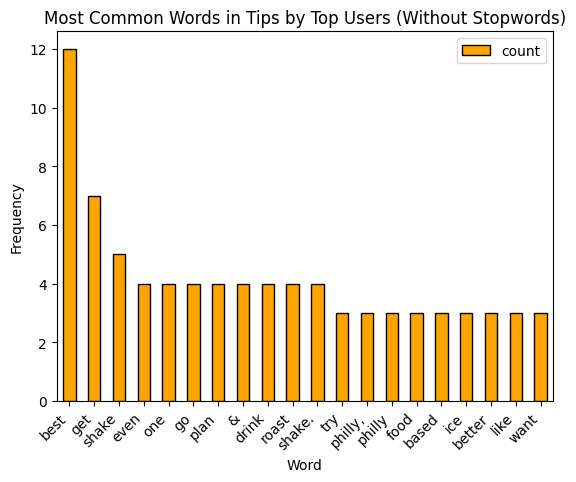

In [47]:
from pyspark.sql.functions import explode, split, lower
from pyspark.ml.feature import StopWordsRemover

# Define stopwords remover
stopwords = StopWordsRemover.loadDefaultStopWords("english")
stopwords_remover = StopWordsRemover(inputCol="words", outputCol="filtered_words", stopWords=stopwords)

# Extract individual words, convert to lowercase, and split
words_df = tip_df.join(top_users_df, "user_id", "inner") \
                 .select(explode(split(lower("text"), "\\s+")).alias("word"))

# Remove stopwords
filtered_words_df = words_df.filter(~words_df["word"].isin(stopwords)) \
                            .filter(words_df["word"] != "")  # Remove empty strings

# Count word frequency
word_counts = filtered_words_df.groupBy("word") \
                               .count() \
                               .orderBy("count", ascending=False) \
                               .limit(20)

# Visualization
word_counts_pd = word_counts.toPandas()
word_counts_pd.plot(kind="bar", x="word", y="count", color="orange", edgecolor="black")
plt.title("Most Common Words in Tips by Top Users (Without Stopwords)")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()


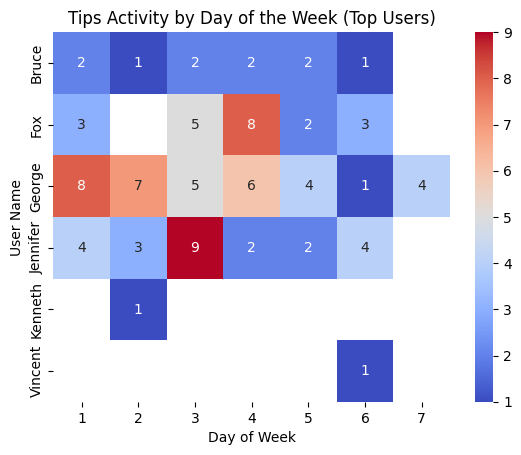

In [50]:
from pyspark.sql.functions import dayofweek

# Extract day of the week from tip dates
tip_days = tip_df.join(top_users_df, "user_id", "inner") \
                 .withColumn("day_of_week", dayofweek("date")) \
                 .groupBy("user_name", "day_of_week") \
                 .count()

# Pivot for heatmap
tip_days_pd = tip_days.toPandas().pivot(index="user_name", columns="day_of_week", values="count")

# Visualization
sns.heatmap(tip_days_pd, annot=True, cmap="coolwarm", fmt="g")
plt.title("Tips Activity by Day of the Week (Top Users)")
plt.xlabel("Day of Week")
plt.ylabel("User Name")
plt.show()


In [51]:
spark.stop()